In [1]:
import sys
sys.path.append("..")

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [24]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from loss import angular_loss_mae
from generator import ValidationTestGenerator
from utils import rotate_preserve_size

In [3]:
# Load model
model = tf.keras.models.load_model("/data/subhadip/weights/model-en-2-ang-loss.h5", 
                                   custom_objects={'angular_loss_mae': angular_loss_mae})

2022-03-30 12:20:33.851812: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-30 12:20:33.852568: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-30 12:20:33.905061: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:09:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-03-30 12:20:33.905092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-30 12:20:34.014958: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-30 12:20:34.015008: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.

In [4]:
# generator
val_gen = ValidationTestGenerator(image_dir="/data/subhadip/data/validation-test/", 
                                  df_label_path="/data/subhadip/data/validation-test.csv",
                                  batch_size=64, dim=299, mode="valid")

In [8]:
# generate predictions
y_pred = model.predict(val_gen)

In [13]:
# get true labels
df_label = pd.read_csv("/data/subhadip/data/validation-test.csv")
df_label = df_label[df_label["mode"] == "valid"]
df_label["pred"] = y_pred.reshape((-1, ))
df_label.head()

,image,angle,mode,pred
1000,000000029255.jpg,35.0,valid,-38.830196
1001,000000097816.jpg,246.0,valid,-171.409912
1002,000000097433.jpg,292.0,valid,-155.691925
1003,000000523570.jpg,129.0,valid,118.845039
1004,000000353998.jpg,128.0,valid,-160.511353


In [18]:
# calculate loss
def calculate_loss(df):
    return angular_loss_mae(np.array([df["angle"]]), np.array([df["pred"]])).numpy()

df_label["loss"] = df_label.apply(calculate_loss, axis=1)
df_label.head()

,image,angle,mode,pred,loss
1000,000000029255.jpg,35.0,valid,-38.830196,73.830196
1001,000000097816.jpg,246.0,valid,-171.409912,57.409912
1002,000000097433.jpg,292.0,valid,-155.691925,87.691925
1003,000000523570.jpg,129.0,valid,118.845039,10.154961
1004,000000353998.jpg,128.0,valid,-160.511353,71.488647


In [20]:
# choose where loss is very low
df_loss_small = df_label[df_label.loss < 1]
df_loss_small

,image,angle,mode,pred,loss
1031,000000573027.jpg,37.0,valid,37.305191,0.305191
1137,000000446275.jpg,126.0,valid,126.185966,0.185966
1539,000000402810.jpg,285.0,valid,-75.672379,0.672379
1664,000000078620.jpg,327.0,valid,-32.381878,0.618122
1986,000000172454.jpg,349.0,valid,-10.174898,0.825102
1995,000000211606.jpg,241.0,valid,-119.076904,0.076904
2142,000000214959.jpg,73.0,valid,73.590858,0.590858
2325,000000137335.jpg,330.0,valid,-29.419718,0.580282
2859,000000574204.jpg,17.0,valid,16.758760,0.241240
2911,000000208419.jpg,65.0,valid,64.904335,0.095665


# Good Examples 

In [46]:
# Image 1
img = Image.open("/data/subhadip/data/validation-test/000000446275.jpg")
img.size

(640, 480)

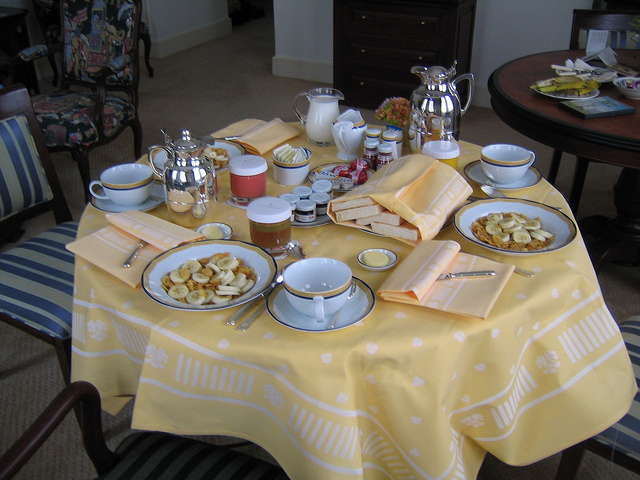

In [47]:
img

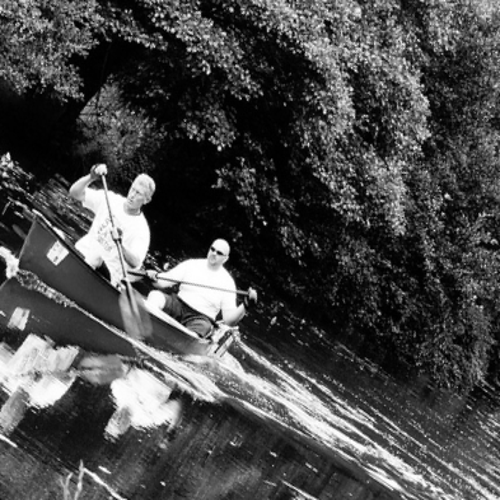

In [45]:
rotate_preserve_size("/data/subhadip/data/validation-test/000000078620.jpg", 327, (500, 500))

# Bad Examples 

In [60]:
df_loss_large = df_label[df_label.loss > 30]
df_loss_large.sample(10)

,image,angle,mode,pred,loss
2039,000000175502.jpg,44.0,valid,160.135040,116.135040
1022,000000138777.jpg,251.0,valid,61.570747,170.570747
2884,000000408720.jpg,186.0,valid,-44.101055,129.898945
2103,000000214144.jpg,335.0,valid,-85.064796,60.064796
2925,000000539661.jpg,261.0,valid,35.872559,134.872559
2727,000000317115.jpg,252.0,valid,-155.597107,47.597107
2783,000000276503.jpg,117.0,valid,-8.043139,125.043139
1406,000000472503.jpg,191.0,valid,68.683472,122.316528
1750,000000396554.jpg,242.0,valid,75.735176,166.264824
2127,000000150540.jpg,42.0,valid,91.774414,49.774414


In [98]:
df_label[df_label.image == "000000285715.jpg"]

,image,angle,mode,pred,loss
2313,000000285715.jpg,319.0,valid,-89.379753,48.379753


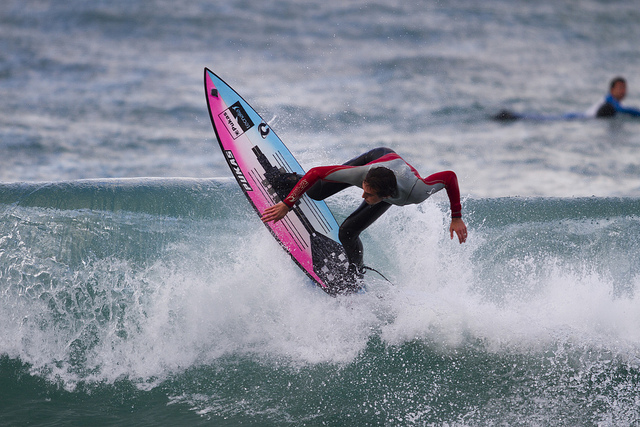

In [91]:
img = Image.open("/data/subhadip/data/validation-test/000000145166.jpg")
img

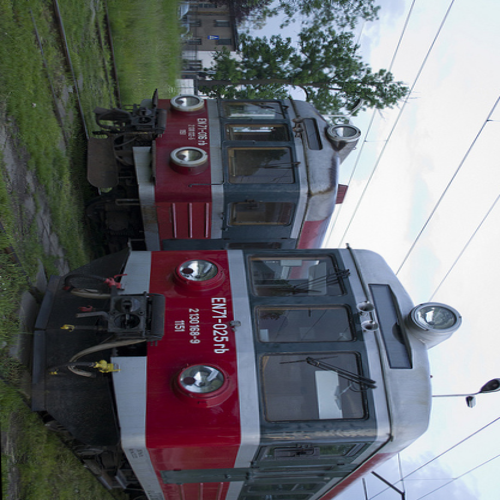

In [100]:
rotate_preserve_size("/data/subhadip/data/validation-test/000000285715.jpg", -89
                    , (500, 500))